<a href="https://colab.research.google.com/github/Vampiref10/2_Terminal_Hacker/blob/main/Project2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv('covid_19_data (3).csv')

In [ ]:
#Percentage of NAN Values
NAN = [(c, data[c].isna().mean()*100) for c in data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,ObservationDate,0.000000
1,Country/Region,0.000000
2,Last Update,0.000000
3,Confirmed,0.001078
4,Deaths,0.001078
5,Recovered,0.001078


In [ ]:
data.head()


,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,1/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,1/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,1/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,1/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data['Active_case'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,1/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,1/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,1/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,1/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


In [ ]:
Data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()

In [ ]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [ ]:
data.head()


,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0,1
1,1/22/2020,Mainland China,1/22/2020 17:00,14,0,0,14
2,1/22/2020,Mainland China,1/22/2020 17:00,6,0,0,6
3,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0,1
4,1/22/2020,Mainland China,1/22/2020 17:00,0,0,0,0


In [ ]:
labels = ["Last Update","Confirmed","Active cases","Recovered","Deaths"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                 cells=dict(values=Data_world.loc[0,["ObservationDate","Confirmed","Active_case","Recovered","Deaths"]]))
                     ])
fig.update_layout(
    title='Coronavirus in the word : ',
)
fig.show()

In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
fig = px.pie(Data_world, values=values, names=labels,color_discrete_sequence=['rgb(77,146,33)','rgb(69,144,185)','rgb(77,77,77)'],hole=0.7)
fig.update_layout(
    title='Total cases : '+str(Data_world["Confirmed"][0]),
)
fig.show()

In [ ]:
data_over_time= data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Confirmed'],
                    mode='lines',marker_color='red',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in the word',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Active_case'],
                    mode='lines',marker_color='red',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Active cases over time in the world',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
DS = data [(data['Country/Region'] == 'Saudi Arabia') ].reset_index(drop=True)
DS.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,3/2/2020,Saudi Arabia,2020-03-02T23:53:02,1.0,0.0,0.0,1.0
1,3/3/2020,Saudi Arabia,2020-03-02T23:53:02,1.0,0.0,0.0,1.0
2,3/4/2020,Saudi Arabia,2020-03-02T23:53:02,1.0,0.0,0.0,1.0
3,3/5/2020,Saudi Arabia,2020-03-05T17:53:03,5.0,0.0,0.0,5.0
4,3/6/2020,Saudi Arabia,2020-03-05T17:53:03,5.0,0.0,0.0,5.0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Active_case'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Deaths'],name='Deaths',
                                   marker_color='Gray',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Saudi Arabia',
        template='plotly_dark'

)

fig.show()

In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np


In [ ]:
DS.dtypes

ObservationDate     object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
Active_case        float64
dtype: object

In [ ]:
DS['Recovered'] = DS.Recovered.astype(float)

In [ ]:
DSS = DS[['Confirmed','Deaths','Recovered','Active_case']]

In [ ]:
DSS.dtypes

Confirmed      float64
Deaths         float64
Recovered      float64
Active_case    float64
dtype: object

In [ ]:
train_size = int(len(DSS)*0.7)
test_size = len(DSS) - train_size
train, test = DSS.iloc[0:train_size], DSS.iloc[train_size:len(DSS)]
print(len(train), len(test))

121 53


In [ ]:
from sklearn.preprocessing import RobustScaler
f_columns = ['Confirmed', 'Deaths', 'Recovered']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)
Active_case_transformer = RobustScaler()
Active_case_transformer = Active_case_transformer.fit(train[['Active_case']])
train['Active_case'] = Active_case_transformer.transform(train[['Active_case']])
test['Active_case'] = Active_case_transformer.transform(test[['Active_case']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is 

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.Active_case, time_steps)
X_test, y_test = create_dataset(test, test.Active_case, time_steps)
print(X_train.shape, y_train.shape,)
print(X_test.shape,y_test.shape)

(111, 10, 4) (111,)
(43, 10, 4) (43,)


Epoch 1/200
3/3 [==============================] - 4s 425ms/step - loss: 0.3094 - val_loss: 0.0549
Epoch 2/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0856 - val_loss: 0.1200
Epoch 3/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0188 - val_loss: 0.2329
Epoch 4/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0360 - val_loss: 0.1611
Epoch 5/200
3/3 [==============================] - 0s 43ms/step - loss: 0.0237 - val_loss: 0.0645
Epoch 6/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0115 - val_loss: 0.0383
Epoch 7/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0130 - val_loss: 0.0561
Epoch 8/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0196 - val_loss: 0.0693
Epoch 9/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0188 - val_loss: 0.0628
Epoch 10/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0151 - val_loss: 0.0492
Epoch 11/200
3/3 [

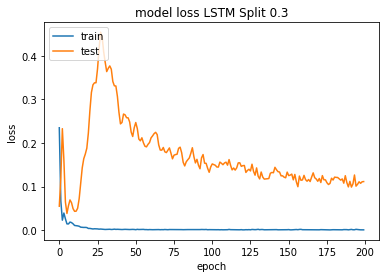

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.3,
    shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss LSTM Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/200
3/3 [==============================] - 1s 87ms/step - loss: 0.2404 - val_loss: 0.3831
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0679 - val_loss: 0.1719
Epoch 3/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0166 - val_loss: 0.0505
Epoch 4/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0099 - val_loss: 0.0308
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0151 - val_loss: 0.0582
Epoch 6/200
3/3 [==============================] - 0s 27ms/step - loss: 0.0119 - val_loss: 0.0657
Epoch 7/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0056 - val_loss: 0.0501
Epoch 8/200
3/3 [==============================] - 0s 29ms/step - loss: 0.0072 - val_loss: 0.0346
Epoch 9/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0082 - val_loss: 0.0339
Epoch 10/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0067 - val_loss: 0.0448
Epoch 11/200
3/3 [=

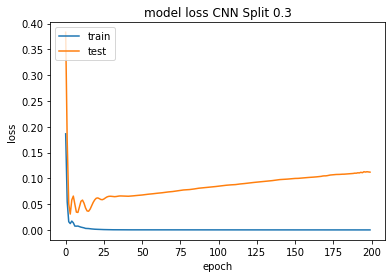

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.3,
    shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss CNN Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/200
3/3 [==============================] - 2s 148ms/step - loss: 0.3162 - val_loss: 0.7652
Epoch 2/200
3/3 [==============================] - 0s 30ms/step - loss: 0.3048 - val_loss: 0.7422
Epoch 3/200
3/3 [==============================] - 0s 28ms/step - loss: 0.2955 - val_loss: 0.7237
Epoch 4/200
3/3 [==============================] - 0s 30ms/step - loss: 0.2860 - val_loss: 0.7120
Epoch 5/200
3/3 [==============================] - 0s 30ms/step - loss: 0.2776 - val_loss: 0.6934
Epoch 6/200
3/3 [==============================] - 0s 26ms/step - loss: 0.2692 - val_loss: 0.6679
Epoch 7/200
3/3 [==============================] - 0s 29ms/step - loss: 0.2600 - val_loss: 0.6403
Epoch 8/200
3/3 [==============================] - 0s 29ms/step - loss: 0.2511 - val_loss: 0.6116
Epoch 9/200
3/3 [==============================] - 0s 26ms/step - loss: 0.2430 - val_loss: 0.5818
Epoch 10/200
3/3 [==============================] - 0s 29ms/step - loss: 0.2346 - val_loss: 0.5508
Epoch 11/200
3/3 [

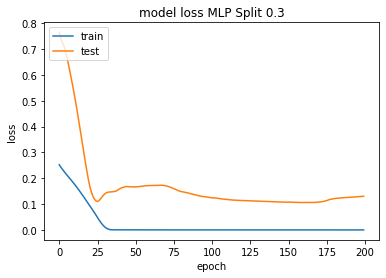

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

    # compile model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
X_train, y_train,
epochs=200,
batch_size=32,
validation_split=0.3,
shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss MLP Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()